In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.use("pgf")
%matplotlib inline
plt.plot([1, 2, 3])
mpl.use("pgf")
mpl.rcParams.update(
    {
        "pgf.texsystem": "lualatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.preamble": "\n".join(
            [
                r"\usepackage{bm}",
                r"\usepackage{mathtools}",
                r"\usepackage{amsmath}",
                r"\DeclarePairedDelimiter\abs{\lvert}{\rvert}%",
                r"\DeclarePairedDelimiter\norm{\lVert}{\rVert}",
                r"\makeatletter",
                r"\let\oldabs\abs",
                r"\def\abs{\@ifstar{\oldabs}{\oldabs*}}",
                r"\let\oldnorm\norm",
                r"\def\norm{\@ifstar{\oldnorm}{\oldnorm*}}",
                r"\makeatother",
                r"\usepackage[dvipsnames]{xcolor}", 
                r"\definecolor{myred}{RGB}{205, 108, 46}",
            ]
        ),
        "font.serif": ["Computer Modern Roman"],
    }
)

import matplotlib.font_manager
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import Divider, Size, make_axes_locatable
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
import os
import os.path as pt
import pickle

import numpy as np
from functools import partial
import pandas as pd

import jax.numpy as jnp
import jax.scipy as jsc
from jax import pmap, jit, vmap

import time

In [2]:
from jax.config import config
config.update("jax_enable_x64", True)
config.update("jax_debug_nans", True)

In [87]:
attemptno = "8.1.1"
n = 99999

In [88]:
values = ("fpred_points", "meanpred", "covpred", "z_vectorf", "predindenv", "cpred", 
            "v_vectorf", "envelopes", "yvel", "meanpredict", "meanpredictns2", "meanpredictps2", "r2",
            "ytest", "tmeanpredict", "tmeanpredictns2", "tmeanpredictps2", "tr2")

In [89]:
matrices = []
for i in range(18):
  loadpath = pt.abspath(pt.join(pt.abspath(''), '../..', 'VastCode/Analysis/Matrices/' + str(n) + '_' + attemptno + 'yvel/' + str(values[i]) + '.pkl'))
  with open(loadpath, 'rb') as f:
    matrices.append(pickle.load(f))

In [90]:
loadpath = pt.abspath(pt.join(pt.abspath(''), '..', 'Data/Hyperparameters/LinearSum/' + str(n) + '_' + str(attemptno) + 'yvel' + '.pkl'))

In [91]:
# with open(loadpath, 'rb') as f:
#   dict = pickle.load(f)

# # sigma_n = dict["Parameters"][2]
# # lag = dict["Parameters"][-1]
sigma_n = 0.0

In [92]:
fpred_points, meanpred, covpred, z_vectorf, predindenv, cpred, v_vectorf, envelopes, yvel, meanpredict, meanpredictns2, meanpredictps2, r2, ytest, tmeanpredict, tmeanpredictns2, tmeanpredictps2, tr2 = matrices

In [93]:
del matrices

In [94]:
ytime = np.linspace(0.0, 139999 * 0.001, 140000)

# Plot

## Dimensions

In [95]:
def set_size_wide(width_pt=426.79135, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5 ** 0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return [fig_width_in, fig_height_in]

In [96]:
def set_size_tall(width_pt=426.79135, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5 ** 0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * (1 / golden_ratio) * (subplots[0] / subplots[1])

    return [fig_width_in, fig_height_in]

In [97]:
def set_size_square(width_pt=426.79135, fraction=1):
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in 

    return [fig_width_in, fig_height_in]

## Plotting

In [98]:
def PlotFilters(FpredPoints, Meanpred, Covpred, Name = "", Fract = 0.35):
  Axsize = set_size_wide(fraction=Fract)
  Fsize1 = (Axsize[0] + 1.4, Axsize[1] + 0.9)
  Fig = plt.figure(figsize=Fsize1)
  H = [Size.Scaled(1), Size.Fixed(Axsize[0]), Size.Scaled(1)]
  V = [Size.Scaled(1), Size.Fixed(Axsize[1]), Size.Scaled(1)]
  Div = Divider(Fig, (0, 0, 1, 1), H, V, aspect=False)
  Ax = Fig.add_axes(
      Div.get_position(), axes_locator=Div.new_locator(nx=1, ny=1)
  )
  S2 = np.sqrt(np.diagonal(Covpred, axis1=1, axis2=2))
  for i in range(Meanpred.shape[0]):
    Ax.plot(FpredPoints, Meanpred[i])
    Ax.fill_between(FpredPoints.flatten(), Meanpred[i].flatten() - S2[i].flatten(), Meanpred[i].flatten() + S2[i].flatten(), alpha=0.3)
  Ax.set_xlabel(r"{Time $(s)$}")
  Ax.set_ylabel(r"{$v_y \left(\frac{m}{s}\right)$}")

  Ax.autoscale(enable=True, axis='x', tight=True)

  Filepath = os.path.abspath('/home/sgome/Project/Reports/Final-Report/Figures/')
  print(Filepath + "/" + Name + '.pgf')
  Fig.savefig(Filepath + "/" + Name + '.pgf', transparent = True, format = 'pgf', pad_inches = 0.0)

In [99]:
def PlotEnvs(FpredPoints, Envelopes, Name = "", Fract = 0.35):
  Axsize = set_size_wide(fraction=Fract)
  Fsize1 = (Axsize[0] + 1.4, Axsize[1] + 0.9)
  Fig = plt.figure(figsize=Fsize1)
  H = [Size.Scaled(1), Size.Fixed(Axsize[0]), Size.Scaled(1)]
  V = [Size.Scaled(1), Size.Fixed(Axsize[1]), Size.Scaled(1)]
  Div = Divider(Fig, (0, 0, 1, 1), H, V, aspect=False)
  Ax = Fig.add_axes(
      Div.get_position(), axes_locator=Div.new_locator(nx=1, ny=1)
  )
  for i in range(Envelopes.shape[0]):
    Ax.plot(FpredPoints, Envelopes[i])
  Ax.set_xlabel(r"{Time $(s)$}")
  Ax.set_ylabel(r"{$v_y \left(\frac{m}{s}\right)$}")

  Ax.autoscale(enable=True, axis='x', tight=True)

  Filepath = os.path.abspath('/home/sgome/Project/Reports/Final-Report/Figures/')
  print(Filepath + "/" + Name + '.pgf')
  Fig.savefig(Filepath + "/" + Name + '.pgf', transparent = True, format = 'pgf', pad_inches = 0.0)

In [100]:
def PlotDat(YTime, Y, MeanPredict, Meanup, Meandown, Low, High, Ind, Name="", Fract=0.35, Train = True, Legend = False):
  Axsize = set_size_wide(fraction=Fract)
  Fsize1 = (Axsize[0] + 1.4, Axsize[1] + 0.9)
  Fig = plt.figure(figsize=Fsize1)
  Legfig = plt.figure()
  H = [Size.Scaled(1), Size.Fixed(Axsize[0]), Size.Scaled(1)]
  V = [Size.Scaled(1), Size.Fixed(Axsize[1]), Size.Scaled(1)]
  Div = Divider(Fig, (0, 0, 1, 1), H, V, aspect=False)
  Ax = Fig.add_axes(
      Div.get_position(), axes_locator=Div.new_locator(nx=1, ny=1)
  )
  Label1 = 'Training Data'
  Color1 = 'tab:orange'
  Label2 = 'Test Data'
  Color2 = 'tab:pink'
  if Train:
    Pop = 1
  else:
    Pop = 0

  Ax.fill_between(YTime[Low:High].flatten(), Meandown[Low:High].flatten(), Meanup[Low:High].flatten(), alpha=0.3) 
  Ax.plot(YTime[Low:High], Y[Ind][Low:High], label=Label1, c=Color1)
  Ax.plot(YTime[Low:High], Y[Ind][Low:High], label=Label2, c=Color2)

  Ax.plot(YTime[Low:High], MeanPredict[Low:High], label='Model Prediction', c='tab:blue')
  Lns, Lbl = Ax.get_legend_handles_labels()
  Legfig.legend(Lns, Lbl, loc='center', ncol = 3, columnspacing = 0.7)
  
  Ax.lines.pop(Pop)
  Ax.set_xlabel(r"{Time $(s)$}")
  Ax.set_ylabel(r"{$v_y\left(\frac{m}{s}\right)$}")
  # Ax.legend(loc=3)
  Ax.autoscale(enable=True, axis='x', tight=True)
  Filepath = os.path.abspath('/home/sgome/Project/Reports/Final-Report/Figures/')
  print(Filepath + "/" + Name + '.pgf')
  Fig.savefig(Filepath + "/" + Name + '.pgf', transparent = True, format = 'pgf', pad_inches = 0.0)

  if Legend:
    Legfig.savefig(Filepath + "/" + Name + 'Legend' + '.pgf', format = 'pgf', bbox_inches = 'tight')

In [101]:
def PlotR2(Actual, Pred, Name="", Fract=0.35, Train = True):
  Axsize = set_size_square(fraction=Fract)
  Fsize1 = (Axsize[0] + 1.4, Axsize[1] + 1.2)
  Fig = plt.figure(figsize=Fsize1)
  H = [Size.Scaled(1), Size.Fixed(Axsize[0]), Size.Scaled(1)]
  V = [Size.Scaled(1), Size.Fixed(Axsize[1]), Size.Scaled(1)]
  Div = Divider(Fig, (0, 0, 1, 1), H, V, aspect=False)
  Ax = Fig.add_axes(
      Div.get_position(), axes_locator=Div.new_locator(nx=1, ny=1)
  )
  Min = np.min([Actual, Pred, -Actual, -Pred])
  Diff = abs(Min+Min)
  Pad = Diff / 16
  Ax.scatter(Actual.flatten(), Pred.flatten(), s=0.005)
  if Train:
    Ax.set_xlabel(r"{Training Data $v_y \left(\frac{m}{s}\right)$}")
  else:
    Ax.set_xlabel(r"{Test Data $v_y \left(\frac{m}{s}\right)$}")
  Ax.set_ylabel(r"{Model Predicted $v_y \left(\frac{m}{s}\right)$}")
  Ax.set_aspect('equal', 'box')
  Ax.set_xlim([Min - Pad, -Min + Pad])
  Ax.set_ylim([Min - Pad, -Min + Pad])
  Yticks = Ax.get_yticks()[1:-1]
  Ax.set_xticks(Yticks)
  Ax.set_yticks(Yticks)

  Filepath = os.path.abspath('/home/sgome/Project/Reports/Final-Report/Figures/')
  print(Filepath + "/" + Name + '.pgf')
  Fig.savefig(Filepath + "/" + Name + '.pgf', transparent = True, format = 'pgf', pad_inches = 0.0)


In [102]:
print(r2)
print(tr2)

0.7365882234543576
0.4803359920427065


/home/sgome/Project/Reports/Final-Report/Figures/FiltersFirst.pgf


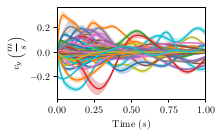

In [75]:
PlotFilters(fpred_points, meanpred, covpred, Name="FiltersFirst")

/home/sgome/Project/Reports/Final-Report/Figures/EnvelopesFirst.pgf


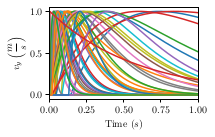

In [76]:
PlotEnvs(fpred_points, envelopes[::3], Name="EnvelopesFirst")

In [77]:
print(np.argmin(np.max(meanpred, axis = -2)))

16


In [78]:
print(np.where(np.max(np.abs(meanpred), axis = -2) < 0.01))

(array([ 31,  39,  47,  72,  75,  76,  81,  98, 106, 113, 117]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


/home/sgome/Project/Reports/Final-Report/Figures/.pgf


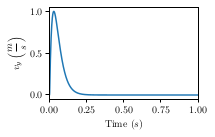

In [79]:
PlotEnvs(fpred_points, np.asarray([envelopes[106]]))

/home/sgome/Project/Reports/Final-Report/Figures/.pgf


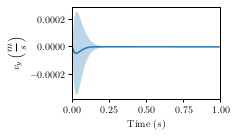

In [80]:
PlotFilters(fpred_points, np.asarray([meanpred[106]]), np.asarray([covpred[106]]))

/home/sgome/Project/Reports/Final-Report/Figures/.pgf


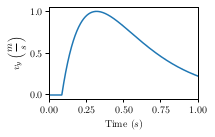

In [81]:
PlotEnvs(fpred_points, np.asarray([envelopes[57]]))

/home/sgome/Project/Reports/Final-Report/Figures/.pgf


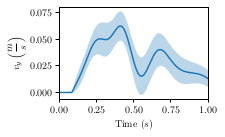

In [82]:
PlotFilters(fpred_points, np.asarray([meanpred[57]]), np.asarray([covpred[57]]))

/home/sgome/Project/Reports/Final-Report/Figures/Trainingfirst.pgf


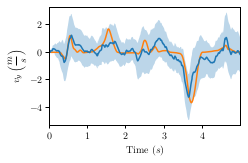

<Figure size 432x288 with 0 Axes>

In [83]:
PlotDat(ytime, yvel, meanpredict, meanpredictps2 + sigma_n, meanpredictns2 - sigma_n, 0, 5000, 2, Train=True, Legend=True, Name="Trainingfirst", Fract=0.45)

/home/sgome/Project/Reports/Final-Report/Figures/Testfirst.pgf


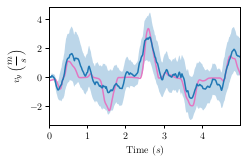

<Figure size 432x288 with 0 Axes>

In [84]:
PlotDat(ytime, ytest, tmeanpredict, tmeanpredictps2 + sigma_n, tmeanpredictns2 - sigma_n, 0, 5000, 0, Train=False, Legend=True, Name="Testfirst", Fract=0.45)

/home/sgome/Project/Reports/Final-Report/Figures/TrainingR2.pgf


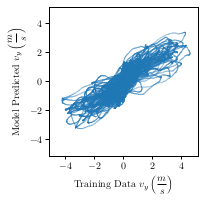

In [85]:
PlotR2(yvel[2], meanpredict, Name="TrainingR2")

/home/sgome/Project/Reports/Final-Report/Figures/TestR2.pgf


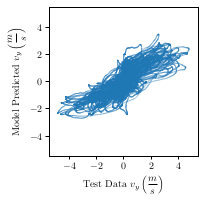

In [86]:
PlotR2(ytest[0], tmeanpredict, Name="TestR2", Train=False)

In [33]:
print(tr2)

0.4803359920427065
